In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
url ="https://code.datasciencedojo.com/datasciencedojo/datasets/raw/master/Abalone/abalone.data.csv"

In [3]:
df = pd.read_csv(url,names = ["sex","length","diameter","height","whole_weight","shucked_weight","viscera_weight","shell_weight","rings"])
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [4]:
df.shape

(4177, 9)

In [5]:
df.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

In [104]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [6]:
df.head()

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


<AxesSubplot:xlabel='sex', ylabel='rings'>

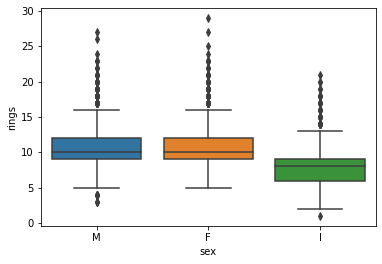

In [114]:
sns.boxplot(data=df,x="sex",y="rings")

In [116]:
df[df.sex=="M"]

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
8,M,0.475,0.370,0.125,0.5095,0.2165,0.1125,0.1650,9
11,M,0.430,0.350,0.110,0.4060,0.1675,0.0810,0.1350,10
...,...,...,...,...,...,...,...,...,...
4170,M,0.550,0.430,0.130,0.8395,0.3155,0.1955,0.2405,10
4171,M,0.560,0.430,0.155,0.8675,0.4000,0.1720,0.2290,8
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [69]:
df.sex.value_counts()

M    1528
I    1342
F    1307
Name: sex, dtype: int64

In [70]:
from sklearn.preprocessing import LabelEncoder

In [71]:
label_encoder = LabelEncoder()

In [72]:
df.sex = label_encoder.fit_transform(df.sex)

In [73]:
df.sex.value_counts()
# F -- 0
# I -- 1
# M -- 2

2    1528
1    1342
0    1307
Name: sex, dtype: int64

In [74]:
X=df.drop(columns=["rings"])
y=df.rings

In [86]:
from sklearn.model_selection import train_test_split

In [76]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.15)

In [77]:
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet

In [78]:
sgd_model = SGDRegressor().fit(X_train,y_train)

In [79]:
y_pred = sgd_model.predict(X_test)

In [80]:
from sklearn.metrics import mean_squared_error, accuracy_score

In [81]:
mean_squared_error(y_test,y_pred)

4.827072750706231

In [83]:
y_pred

array([ 9.82058608, 12.1669937 ,  7.67720698,  9.10336799,  9.08035035,
        7.95754351, 10.327138  ,  7.81096083,  7.77986867, 10.86047484,
       11.91377988,  7.40618701,  8.84353003,  9.90533973,  8.49765939,
       10.91341856,  6.7465093 ,  8.41290806, 10.39973206,  8.36742935,
        9.60580206,  7.92477014, 12.01146737,  9.35140859, 10.31951242,
        9.09638052, 10.64444742, 12.26758132, 10.8963909 ,  8.17070493,
       12.84705431,  9.2545114 ,  9.73443591, 10.29559638,  8.59286285,
        9.1657234 ,  8.87755804, 11.91890058,  8.81962633,  7.79471557,
       11.4112517 ,  5.59214202,  9.16787858, 10.84351099,  9.1861478 ,
       11.85703376,  9.54450439, 10.59086756, 12.68860506, 10.52285545,
       10.64264111,  8.74118261,  8.80369596,  9.04480833,  7.58317583,
        5.75608431,  9.12898884,  6.17066282, 11.13667649, 10.08731014,
        6.08061304,  9.27486731, 13.95697393, 11.82729604,  8.89646295,
       12.27817601, 12.03703952, 12.21097616, 11.75390352,  8.99